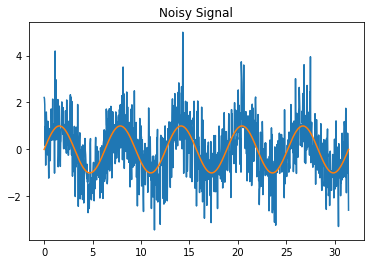

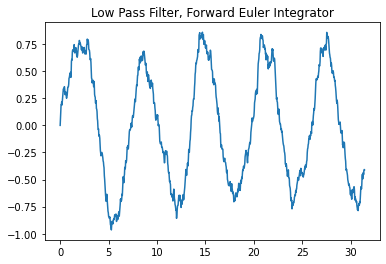

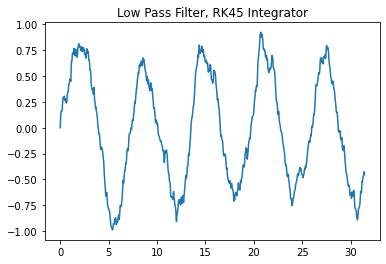

In [20]:
#example of a low pass filter based on the simple RC model
#main issue with this filter is that higher resolution comes at the cost of phase shift

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math
np.random.seed(123456789)

tspan =  np.linspace(0, 10*np.pi, 1000) 
teval = 0
Vin = lambda t: np.sin(t)
mynoise = 1*np.random.randn(*Vin(tspan).shape)
Vinarray = Vin(tspan) + mynoise

#def spectrum(x):
#    return np.abs(np.fft.ifft(x))

plt.plot(tspan, Vinarray)
plt.plot(tspan, Vin(tspan))
plt.title("Noisy Signal")
plt.show()

#mysignal_spectrum = spectrum(Vin(tspan))
#mynoise_spectrum  = spectrum(mynoise)
#N1 = 500
#f = np.arange(N1)
#plt.figure(figsize=(8,4))
#plt.plot(mynoise_spectrum[:N1])
#plt.plot(f,mysignal_spectrum[:N1])
#plt.xlim(0,N1)
#plt.legend(('signal','noise'))
#plt.xlabel('frequency')
#plt.ylabel('amplitude')
#plt.show()


Voutarray = np.zeros_like(Vinarray)

#Used to find t with the scipy integraton
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return idx-1
    else:
        return idx

#Forward Euler timestepped
def lowpass(tstep, Vin, tau):
    Vout = np.zeros_like(Vin)
    for t in range(Vin.size-1):
        Vout[t+1] = Vout[t]+(tstep/tau)*(Vin[t]-Vout[t])
    return Vout
    

tau = 1
tstep = tspan[1]-tspan[0]
plt.plot(tspan,lowpass(tstep, Vinarray, tau))
plt.title("Low Pass Filter, Forward Euler Integrator")
plt.show()


def f(t, y):  
    dydt = (1/tau)*(Vinarray[find_nearest(tspan, t)]-y)
    return dydt


sol = solve_ivp(lambda t, y: f(t, y),[tspan[0], tspan[-1]],[0], t_eval=tspan)
plt.plot(sol.t, sol.y[0,:])
plt.title("Low Pass Filter, RK45 Integrator")
plt.show()
#ax.plot(sol.t, x(sol.t), 'k-', label='Input')
#ax.plot(sol.t, sol.y[0], 'k--', label='Output')
#ax.legend(loc='best')

